The majority of the type is spent preparing your data for modeling. So in this article, we will go through the data cleaning process and a basic EDA to understand our data. Our goal is to use this marketing data to build a model to predict if a person would register for the bank's service. 

- Data cleaning
- Data prep (putting the data in the right formats, how we deal with missing values)
- EDA
- Formulate hypotheis and draw insights form the data
- Formulate a conclusion

# Data Cleaning

In [ ]:
# importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read in the data

df = pd.read_csv(r"C:\Users\ebaraka\Downloads\bank-marketing-data.csv")
df.head()

,;age;job;marital;education;credit_in_default;housing_loan;personal_loan;last_contact_type;last_contact_month;last_contact_day;last_contact_duration;n_contacts_this_campaign;days_since_last_contact;n_contacts_prev_campaign;prev_campaign_outcome;registered
0,0;38.0;student - Albufeira;divorced;unknown;no...
1,1;34.0;services - Mealhada;married;professiona...
2,2;43.0;housemaid - Vila Franca de Xira;;;unkno...
3,3;75.0;retired - Mirandela;married;basic.4y;no...
4,4;58.0;retired - Funchal;married;unknown;no;un...


The default delimiter for read_csv is a comma, however for this dataset delimiter is a semicolon, so we use that to read the data

In [33]:

df = pd.read_csv(r"C:\Users\ebaraka\Downloads\bank-marketing-data.csv", sep=";")
df.head()



,Unnamed: 0,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [35]:
df = pd.read_csv(r"C:\Users\ebaraka\Downloads\bank-marketing-data.csv", sep=";", index_col=0)
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [36]:
df.shape

(11720, 16)

In [12]:
print(f"Our data has {df.shape[1]} columns and {df.shape[0]} rows. Assuming there are no duplicates in the data and each row represents a customer, we have {df.shape[0]} customers.")

Our data has 16 columns and 11720 rows. Assuming there are no duplicates in the data and each row represents a customer, we have 11720 customers.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

There aren't a lot of missing values in most of the columns but last_contact_duration has many missing values. Also some of the columns are in the wrong formats. (we can visualize this as a time series by combining day month and year). 

Job and city or location are in the same column, so should work on splitting the job column into two. there are punctuations in education column. 

In [26]:
cols = df['job'].str.split("-", expand = True)
cols.head()

,0,1,2,3,4
0,student,Albufeira,None,None,None
1,services,Mealhada,None,None,None
2,housemaid,Vila Franca de Xira,None,None,None
3,retired,Mirandela,None,None,None
4,retired,Funchal,None,None,None


In [29]:
df['job'] = cols[0]
df['location'] = cols[1]

In [30]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal


In [39]:
df[['job', 'location']] = df['job'].str.split(" - ", expand = True)

In [40]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
0,38.0,student,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no,Albufeira
1,34.0,services,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no,Mealhada
2,43.0,housemaid,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no,Vila Franca de Xira
3,75.0,retired,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no,Mirandela
4,58.0,retired,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no,Funchal


In [44]:
df[['job', 'location']] = df['job'].apply(lambda x: x.split(" - ") if " - " in x else [x, ""])

# lambda is usually used with apply method, is used to apply a function to each element of a dataframe

TypeError: argument of type 'float' is not iterable

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11720 entries, 0 to 11719
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

In [45]:
!pip --upgrade pandas


Usage:   
  pip <command> [options]

no such option: --upgrade


In [ ]:
bank_df[["job", "location"]]=bank_df['job'].str.split(' - ',expand=True).apply(lambda x: x.str.strip())


We don't need duplicates in our data...

In [46]:
df.duplicated().sum()

51

In [47]:
df.isna().sum()

age                          588
job                          693
marital                      728
education                    715
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     693
dtype: int64

if you are already short on data, you can impute your missing values with a good alternative. There is a very high chance of introducing bias in the data if those with missing values are differnt in some ways from those with no missing values.

when using value_counts try to normalize it since it is easier to compare percentages

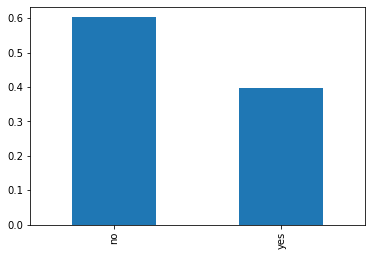

In [52]:
df['registered'].value_counts(normalize=True).plot(kind = 'bar')
plt.show()

In [54]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11132,NaN,NaN,NaN,40.3767,11.7036,17,32,38,48,98
job,11027,12,admin.,2897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,10992,4,married,6422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11005,8,university.degree,3424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_in_default,11720,3,no,9687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_loan,11720,3,yes,6190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,11720,3,no,9722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_contact_type,11720,2,cellular,8141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_contact_month,11720,10,may,3379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_contact_day,11720,5,thu,2553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.groupby('registered').mean()

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
registered,,,,,
no,40.025675,218.928437,2.586886,985.069537,0.132984
yes,40.907061,546.074211,2.052372,792.240180,0.492166


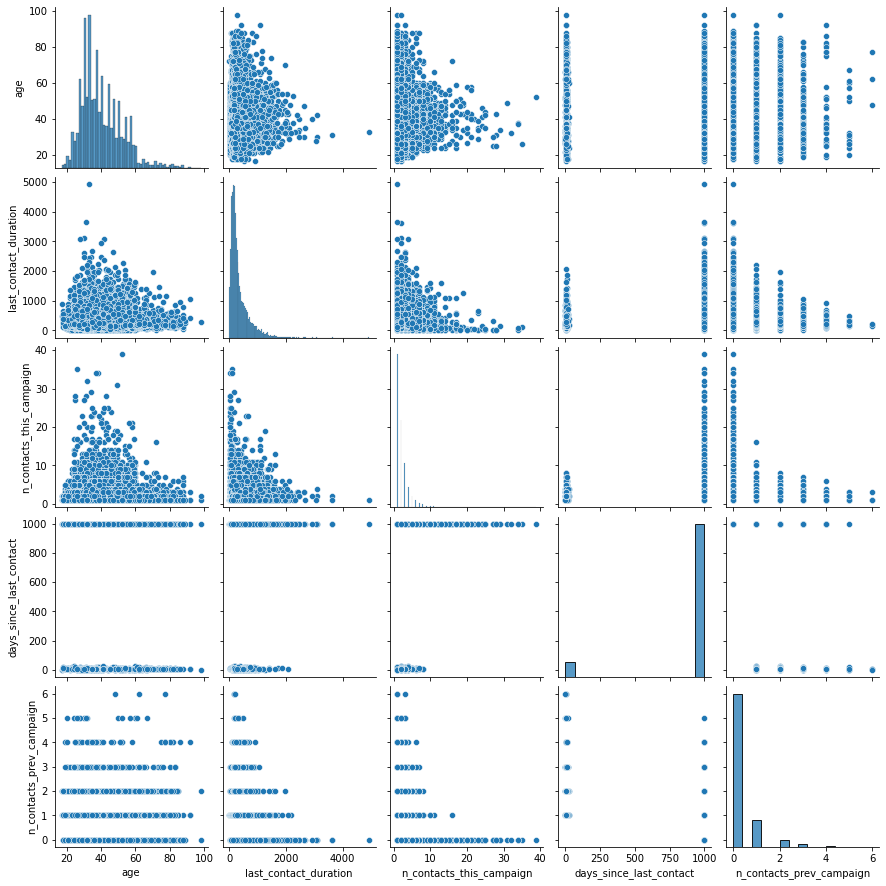

In [56]:
sns.pairplot(df)